In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })


In [4]:
df = pd.read_parquet("../data/combined_all.parquet")

In [5]:
df = df[df["population"] < 2e9]

In [6]:
df["arwu_ranked_num"] = df["arwu_ranked_num"] / df["population"] * 1_000_000
df["imo_total_score"] = df["imo_total_score"] / np.log(df["population"])
# pd_df["arwu_ranked_num"] = np.maximum(pd_df["arwu_ranked_num"], pd_df["arwu_sum_score"]) / pd_df["population"] * 1_000_000
df["gdp_pc_growth"] = 100 * df["gdp_pc_growth"]
# pd_df["gdp_pc"] = np.log(pd_df["gdp_pc"])
# pd_df["population"] = np.log(pd_df["population"])

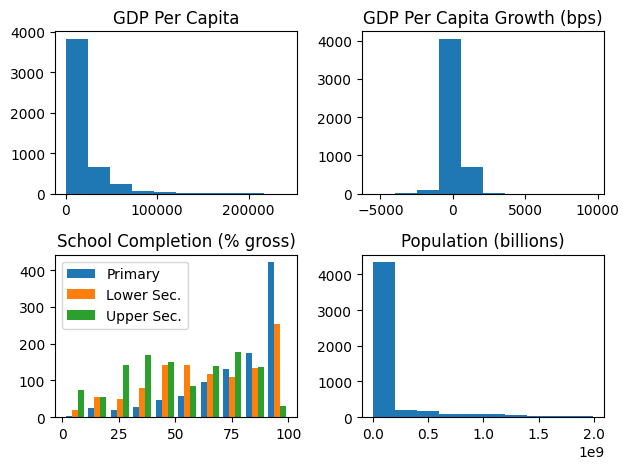

In [7]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)
ax0.hist(df["gdp_pc"])
ax0.set_title("GDP Per Capita")

ax1.hist(df["gdp_pc_growth"])
ax1.set_title("GDP Per Capita Growth (bps)")

ax2.hist([df["primary_completion"], df["lower_sec_completion"], df["upper_sec_completion"]], label=["Primary", "Lower Sec.", "Upper Sec."])
ax2.legend(prop={'size': 10})
ax2.set_title("School Completion (% gross)")

ax3.hist(df["population"])
ax3.set_title("Population (billions)")
fig.tight_layout()
# fig.set_size_inches(w=4.3, h=4)
plt.savefig("wdi.png", dpi=300)

In [8]:
counts = df.groupby("year").count().reset_index()
counts

,year,country,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
0,2003,255,244,240,19,20,21,255,255,255,40,40,40,40,255,0
1,2004,255,244,240,35,35,38,255,255,255,0,0,0,0,255,0
2,2005,255,244,241,39,41,45,255,255,255,0,0,0,0,255,0
3,2006,255,245,241,46,53,55,255,255,255,56,55,56,56,255,166
4,2007,255,245,242,51,55,58,255,255,255,0,0,0,0,255,0
5,2008,255,246,242,54,62,63,255,255,255,0,0,0,0,255,166
6,2009,255,246,245,56,65,69,255,255,255,69,69,69,69,255,0
7,2010,255,247,245,63,73,77,255,255,255,0,0,0,0,255,166
8,2011,255,250,245,65,72,77,255,255,255,0,0,0,0,255,166
9,2012,254,247,244,57,63,68,254,254,254,62,62,62,62,254,166


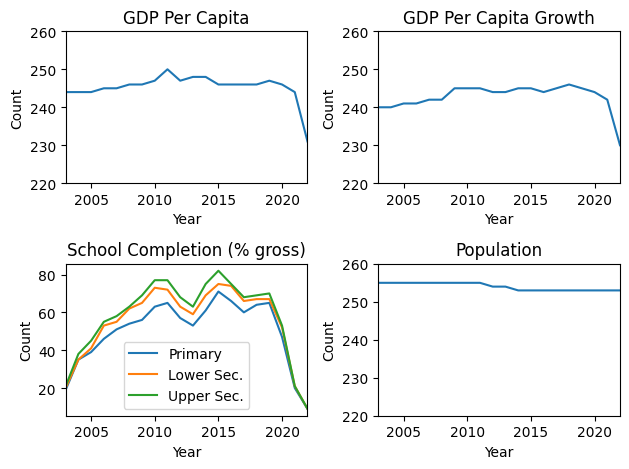

In [9]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2)

for ax in [ax0, ax1, ax2, ax3]:
    ax.set_xlim((2003, 2022))
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")

for ax in [ax0, ax1, ax3]:
    ax.set_ylim((220, 260))


ax0.plot(counts["year"], counts["gdp_pc"])
ax0.set_title("GDP Per Capita")

ax1.plot(counts["year"], counts["gdp_pc_growth"])
ax1.set_title("GDP Per Capita Growth")

ax2.plot(counts["year"], counts["primary_completion"], label="Primary")
ax2.plot(counts["year"], counts["lower_sec_completion"], label="Lower Sec.")
ax2.plot(counts["year"], counts["upper_sec_completion"], label="Upper Sec.")
ax2.legend(prop={'size': 10})
ax2.set_title("School Completion (% gross)")

ax3.plot(counts["year"], counts["population"])
ax3.set_title("Population")
fig.tight_layout()
# fig.set_size_inches(w=4.3, h=4)
# plt.show()
plt.savefig("wdi-count.png", dpi=300)

In [10]:
country = df.groupby("country").mean()

In [11]:
country.sort_values(by=["arwu_sum_score"], ascending=False).head(10)

,year,gdp_pc,gdp_pc_growth,primary_completion,lower_sec_completion,upper_sec_completion,population,arwu_ranked_num,arwu_sum_score,math,read,science,in_math99,imo_total_score,democracy_eiu
country,,,,,,,,,,,,,,,
USA,2012.5,54346.507755,125.761329,98.579321,94.978179,88.031516,3.139536e+08,0.539672,2059.525,477.791562,497.060056,494.810545,0.430899,9.619580,8.040667
GBR,2012.5,42931.836818,93.609566,99.866566,99.810368,81.331079,6.379537e+07,0.715797,378.620,496.275860,499.181558,508.771609,1.050237,0.000000,8.303333
JPN,2012.5,39707.808635,73.529185,99.556335,98.615227,82.758038,1.272585e+08,0.239411,139.605,531.083978,512.728972,539.553325,2.345962,8.284290,8.081333
DEU,2012.5,43009.094750,112.510203,100.000000,96.720137,81.153484,8.215634e+07,0.516277,135.270,507.858315,501.707278,513.922042,1.341289,0.000000,8.602000
CAN,2012.5,45059.375393,78.014508,NaN,NaN,82.207191,3.499655e+07,0.671448,133.310,512.096588,512.612879,515.030926,1.686589,8.135857,9.085333
CHE,2012.5,77450.638698,101.585081,99.670441,96.610980,83.918866,8.046006e+06,1.018567,126.565,521.760861,492.059137,503.154307,2.715032,0.000000,9.050667
AUS,2012.5,51170.592058,126.473114,99.885475,92.500326,72.978461,2.289983e+07,0.929171,124.705,502.430588,505.812297,513.258889,1.650902,7.801845,9.056000
FRA,2012.5,39641.301935,67.657796,98.244534,80.146239,64.080930,6.556491e+07,0.372766,110.750,499.206407,497.094374,500.041962,0.983179,6.218828,7.942000
SWE,2012.5,52714.704613,143.863822,100.000000,89.010317,77.198841,9.643077e+06,1.185812,94.780,497.082008,501.842092,496.965921,0.938993,4.819793,9.524667


In [12]:
print(country.sort_values(by=["imo_total_score"], ascending=False).head(10)[["imo_total_score", "gdp_pc", "gdp_pc_growth"]].round(4).to_latex())

\begin{tabular}{lrrr}
\toprule
 & imo_total_score & gdp_pc & gdp_pc_growth \\
country &  &  &  \\
\midrule
KOR & 10.202600 & 26060.920300 & 293.855200 \\
CHN & 9.829600 & 6424.497200 & 786.817100 \\
USA & 9.619600 & 54346.507800 & 125.761300 \\
RUS & 9.080000 & 10432.836600 & 277.070400 \\
SGP & 9.064200 & 51652.465100 & 348.054300 \\
BGR & 8.882100 & 7556.393300 & 417.756400 \\
ROU & 8.736700 & 9432.669800 & 439.752200 \\
HUN & 8.715300 & 13979.700900 & 262.965000 \\
VNM & 8.502900 & 2159.258300 & 527.640400 \\
UKR & 8.394100 & 3079.837800 & 131.930300 \\
\bottomrule
\end{tabular}



In [13]:
print(country[country["imo_total_score"] > 0].sort_values(by=["imo_total_score"], ascending=False).tail(10)[["imo_total_score", "gdp_pc", "gdp_pc_growth"]].round(4).to_latex())

\begin{tabular}{lrrr}
\toprule
 & imo_total_score & gdp_pc & gdp_pc_growth \\
country &  &  &  \\
\midrule
OMN & 0.075000 & 18748.210800 & -26.358800 \\
KEN & 0.064900 & 1296.839000 & 208.390400 \\
BFA & 0.056800 & 656.325300 & 248.340500 \\
PSE & 0.045400 & 2759.924900 & 283.644200 \\
MOZ & 0.044600 & 524.895800 & 275.691400 \\
ZWE & 0.030500 & 1103.395900 & -16.878800 \\
JAM & 0.030300 & 4928.882500 & 24.813000 \\
MDG & 0.029300 & 457.031700 & 51.216700 \\
BEN & 0.015500 & 1068.735700 & 157.022900 \\
GMB & 0.003400 & 673.515300 & 32.092200 \\
\bottomrule
\end{tabular}



In [14]:
df["year"] = df["year"].astype(str)
df.groupby("year")["arwu_ranked_num"].sum()

year
2003    16.567065
2004    16.265311
2005    16.704916
2006    16.661950
2007    17.095011
2008    16.814477
2009    16.772772
2010    16.679123
2011    16.764073
2012    16.680582
2013    16.750403
2014    15.945272
2015    15.563255
2016    16.663360
2017    31.412861
2018    37.623086
2019    37.540294
2020    36.366873
2021    36.301140
2022    35.916453
Name: arwu_ranked_num, dtype: float64

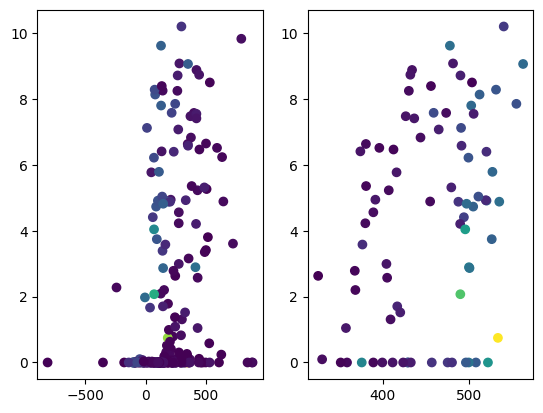

In [28]:
fig, (bx0, bx1) = plt.subplots(1, 2)
bx0.scatter(country["gdp_pc_growth"], country["imo_total_score"], c=country["gdp_pc"])
bx1.scatter(country["math"], country["imo_total_score"], c=country["gdp_pc"])